In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from matplotlib import colors as mcolors

from package_Engels_Theo_Losseau_Baudouin import Lead_Lag_Discreet_RT, PID_RT, FF_RT, sim_tclabP, sim_tclabD, IMC_Tuning_SOPDT,margins

import package_DBR
from package_DBR import myRound, SelectPath_RT, Delay_RT, FO_RT, FOPDT, SOPDT, FOPDT_cost, SOPDT_cost, Process, Bode

(0.0, 50.0)

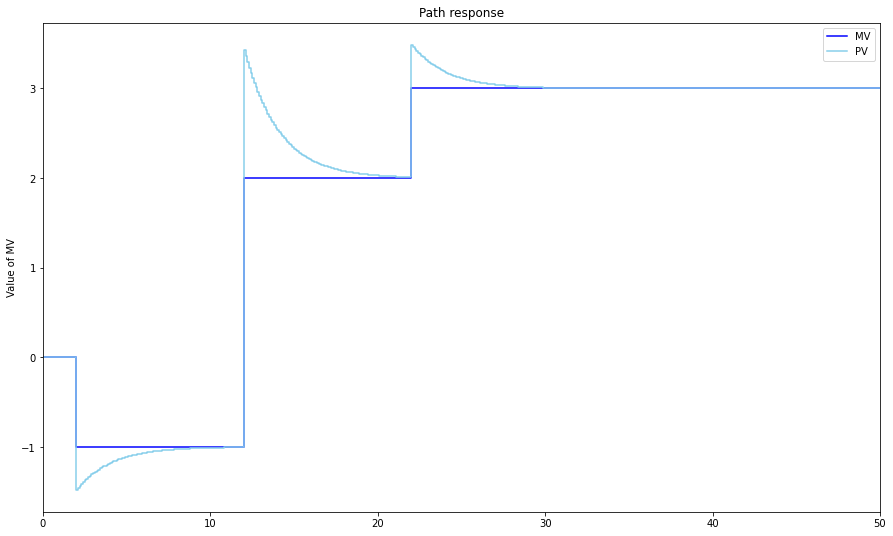

In [2]:
TSim = 50
Ts = 0.1
N = int(TSim/Ts) + 1

# Path for MV and MVMan
MVPath = {0: 0, 2: -1,12:2,22:3}


t = []
MV = []
PV = []

for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)
    Lead_Lag_Discreet_RT(MV,PV,3,2,0.1)
    
plt.figure(figsize = (15,9))

plt.step(t,MV,'b-',label='MV',where='post')
plt.step(t,PV,'skyblue',label='PV',where='post')
plt.ylabel('Value of MV')
plt.legend(loc='best')
plt.title('Path response')
plt.xlim([0, TSim])

10001
10001


(0.0, 1000.0)

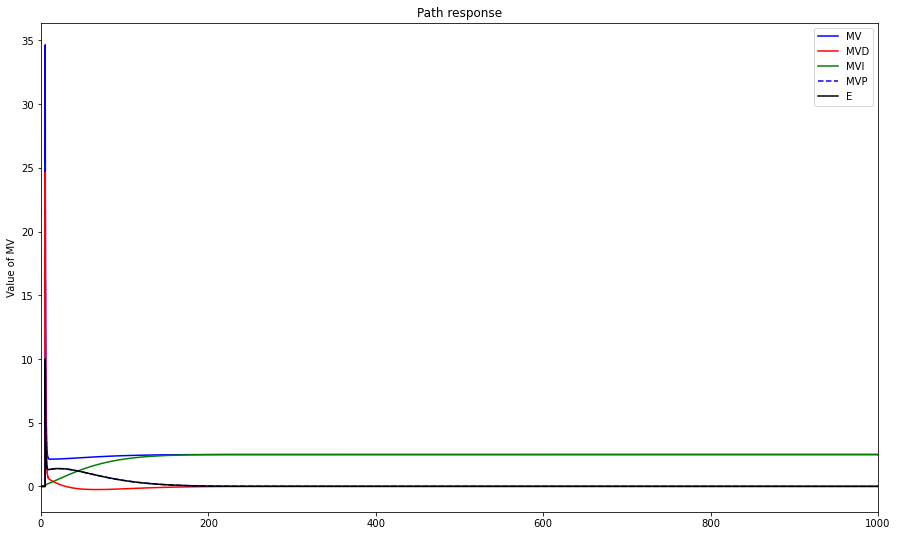

In [3]:
TSim = 1000
Ts = 0.1
N = int(TSim/Ts) + 1

# Path for MV and MVMan
SPPath = {0: 0,5:10}
PVPath = {0:0}


t = []
MV = [0]
PV = []
SP = [0]
MVP = []
MVI = []
MVD = []
E = [0]
Et = []


for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(SPPath,t,SP)
    #SelectPath_RT(PVPath,t,PV)
    FO_RT(MV,4,10,Ts,PV)
    PID_RT(SP,PV,[0],[0],[0],1,48,17,Ts,0,100,MV,MVP,MVI,MVD,E)

print(len(MV))
print(len(t))
    
plt.figure(figsize = (15,9))

plt.step(t,MV,'b',label='MV',where='post')
#plt.step(t,PV,'skyblue',label='PV',where='post')
plt.step(t,MVD,'red',label='MVD',where='post')
plt.step(t,MVI,'green',label='MVI',where='post')
plt.step(t,MVP,'b--',label='MVP',where='post')
plt.step(t,E,'black',label='E',where='post')
#plt.step(t,PV,'orange',label='PV',where='post')
plt.ylabel('Value of MV')
plt.legend(loc='best')
plt.title('Path response')
plt.xlim([0, TSim])

1.3475206611570247 65.22 34.78


(0.0, 1000.0)

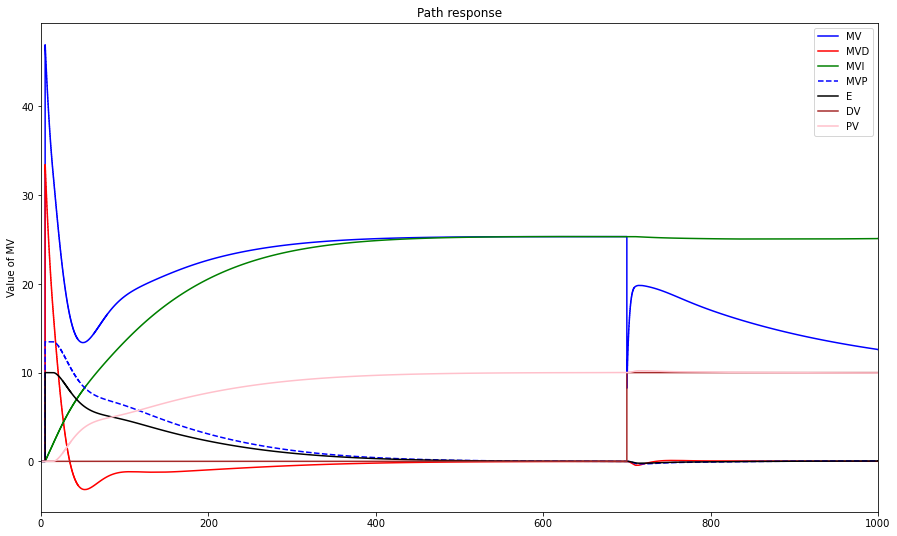

In [9]:
TSim = 1000
Ts = 0.1
N = int(TSim/Ts) + 1
DV0=50

# Path for MV and MVMan
SPPath = {0: 0,5:10}
#ManPath = {0:0,400:1,600:0}
ManPath = {0:0}
MVManPath={0:0,400:50,450:10,500:0}
DVPath = {0:50,700:60}

#ParamP = {"K":0.3953,"T1":47.8373}

t = []
MV = [0]
MVMan = []
Man = []
PV = []
SP = [0]
MVP = []
MVI = []
MVD = []
E = [0]
Et = []
MVFF = []
ODV = []
OPV = []
DV = []
PVtemp1 = []
PVtemp2 = []
DVtemp1 = []
DVtemp2 = []

FFtemp1 = []
FFtemp2 = []

Kc,Ti,Td = IMC_Tuning_SOPDT(0.39,47.83,17.39,9.31,0.2)
print(Kc,Ti,Td)
for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(SPPath,t,SP)
    SelectPath_RT(DVPath,t,DV)
    SelectPath_RT(ManPath,t,Man)
    SelectPath_RT(MVManPath,t,MVMan)
    sim_tclabP(MV,OPV,Ts,PVtemp1,PVtemp2)
    DV[-1]-=DV0
    sim_tclabD(DV,ODV,Ts,DV0,DVtemp1,DVtemp2)
    PV = list(map(lambda x,y: x+y,OPV,ODV))
    FF_RT(DV,DV0,47.84,245.36,17.39,3.13,9.31,0.56,0.39,0.63,Ts,MVFF,FFtemp1,FFtemp2)
    #PID_RT(SP,PV,Man,MVMan,MVFF,1,48,17,Ts,0,100,MV,MVP,MVI,MVD,E,ManFF = 1)
    PID_RT(SP,PV,Man,MVMan,MVFF,Kc,Ti,Td,Ts,0,100,MV,MVP,MVI,MVD,E,ManFF = 1)

# print(len(MV))
# print(len(t))
# print(OPV)
plt.figure(figsize = (15,9))

plt.step(t,MV,'b',label='MV',where='post')
#plt.step(t,PV,'skyblue',label='PV',where='post')
plt.step(t,MVD,'red',label='MVD',where='post')
plt.step(t,MVI,'green',label='MVI',where='post')
plt.step(t,MVP,'b--',label='MVP',where='post')
plt.step(t,E,'black',label='E',where='post')
plt.step(t,DV,'brown',label='DV',where='post')
plt.step(t,PV,'pink',label='PV',where='post')
plt.ylabel('Value of MV')
plt.legend(loc='best')
plt.title('Path response')
plt.xlim([0, TSim])

In [ ]:
P = Precess({})
P.parameters['Kp']=0.39
P.parameters['Tlag1']=47.83
P.parameters['Tlag2']=17.39
P.parameters['theta']=9.31
C = Precess({})
C.parameters['Kp']=Kc
C.parameters['Tlag1']=47.83
C.parameters['Tlag2']=17.39

margins()